In [1]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers

In [4]:
import os
print(os.listdir(r'C:\Users\ibuku\Music\Music'))


['test', 'train']


In [5]:
train_dir =r'C:\Users\ibuku\Music\Music\test'
test_dir  =r'C:\Users\ibuku\Music\Music\train'

In [7]:
print('Train Directory :')
print(os.listdir(r'C:\Users\ibuku\Music\Music\train'))

Train Directory :
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [8]:
print("Test_Directory :")
print(os.listdir(r'C:\Users\ibuku\Music\Music\test'))

Test_Directory :
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [9]:
print('Count of Images in Training Set: ')
for exp in os.listdir(train_dir):
    print(str(len(os.listdir(train_dir+'/'+exp)))+" "+exp+" "+"images")

Count of Images in Training Set: 
958 angry images
111 disgust images
1024 fear images
1774 happy images
1233 neutral images
1247 sad images
831 surprise images


In [10]:
print('Count of Images in Testing Set: ')
for exp in os.listdir(test_dir):
    print(str(len(os.listdir(test_dir+'/'+exp)))+" "+exp +" "+"images")

Count of Images in Testing Set: 
3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


In [11]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

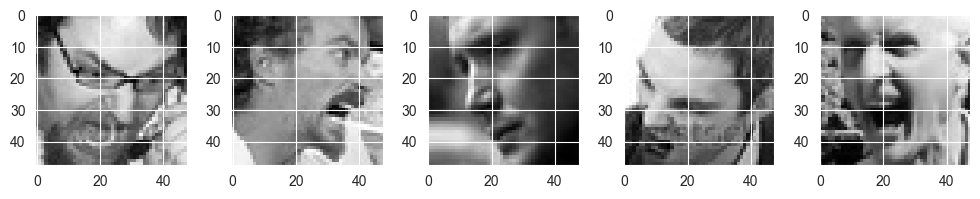

In [12]:
plot_images(train_dir+"/"+"angry")

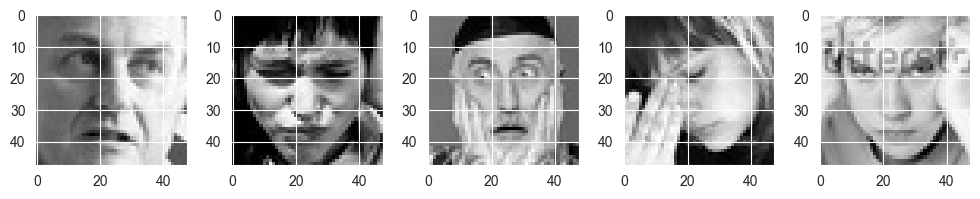

In [13]:
plot_images(train_dir+"/"+"sad")

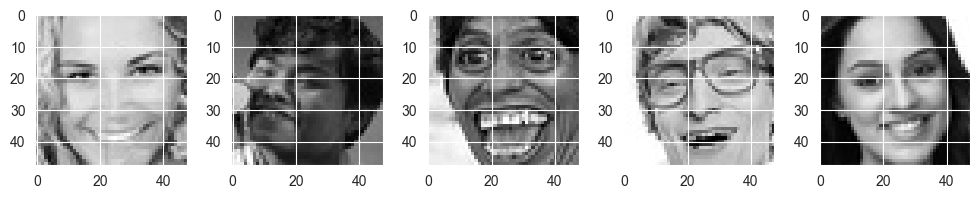

In [14]:
plot_images(train_dir+"/"+"happy")

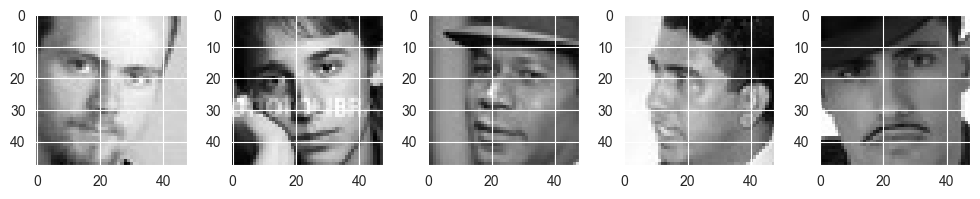

In [15]:
plot_images(train_dir+"/"+"neutral")

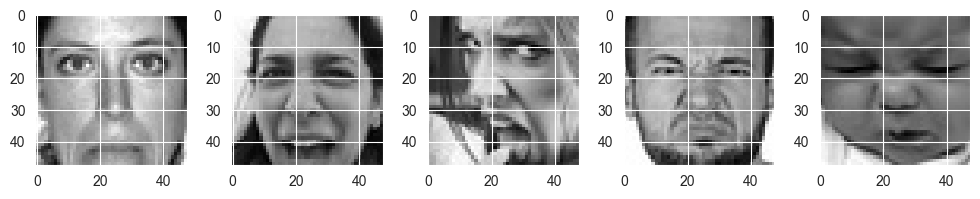

In [16]:
plot_images(train_dir+"/"+"disgust")

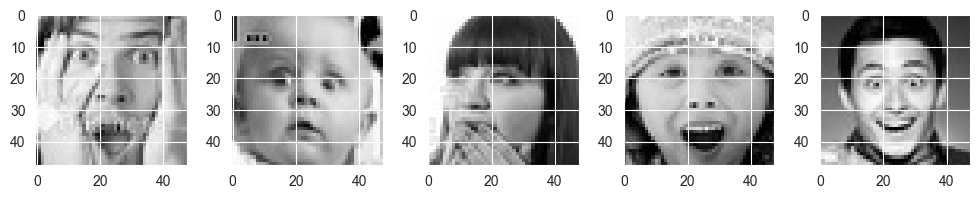

In [17]:
plot_images(train_dir+"/"+"surprise")

In [18]:
img_size = 48 #original size of the image

In [19]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)


In [20]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )


Found 5746 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


## Modelling 

In [21]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )


In [22]:
epochs = 60
batch_size = 64

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [24]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
90/90 [==============================] - 121s 1s/step - loss: 8.9243 - accuracy: 0.2014 - val_loss: 7.1499 - val_accuracy: 0.2515
Epoch 2/60
90/90 [==============================] - 116s 1s/step - loss: 5.3958 - accuracy: 0.2210 - val_loss: 4.4921 - val_accuracy: 0.2513
Epoch 3/60
90/90 [==============================] - 116s 1s/step - loss: 3.4551 - accuracy: 0.2369 - val_loss: 3.1012 - val_accuracy: 0.2291
Epoch 4/60
90/90 [==============================] - 116s 1s/step - loss: 2.6718 - accuracy: 0.2450 - val_loss: 2.7703 - val_accuracy: 0.2513
Epoch 5/60
90/90 [==============================] - 115s 1s/step - loss: 2.3521 - accuracy: 0.2771 - val_loss: 2.4062 - val_accuracy: 0.2440
Epoch 6/60
90/90 [==============================] - 114s 1s/step - loss: 2.2487 - accuracy: 0.3155 - val_loss: 2.4579 - val_accuracy: 0.2724
Epoch 7/60
90/90 [==============================] - 118s 1s/step - loss: 2.2901 - accuracy: 0.3305 - val_loss: 2.5702 - val_accuracy: 0.2515
Epoch 8/60
90

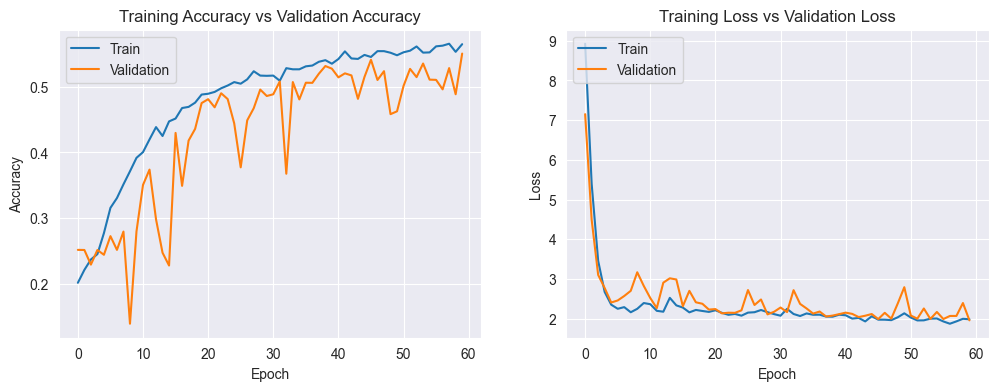

In [26]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [27]:
model.save('model_optimal.h5')

In [28]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))


90/90 [==============================] - 27s 297ms/step - loss: 1.9575 - accuracy: 0.5506
final train accuracy = 59.66 , validation accuracy = 55.06


In [29]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']


In [30]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_size,img_size),
    color_mode="grayscale",
    shuffle=True,
    batch_size=64,
)

Found 28709 images belonging to 7 classes.


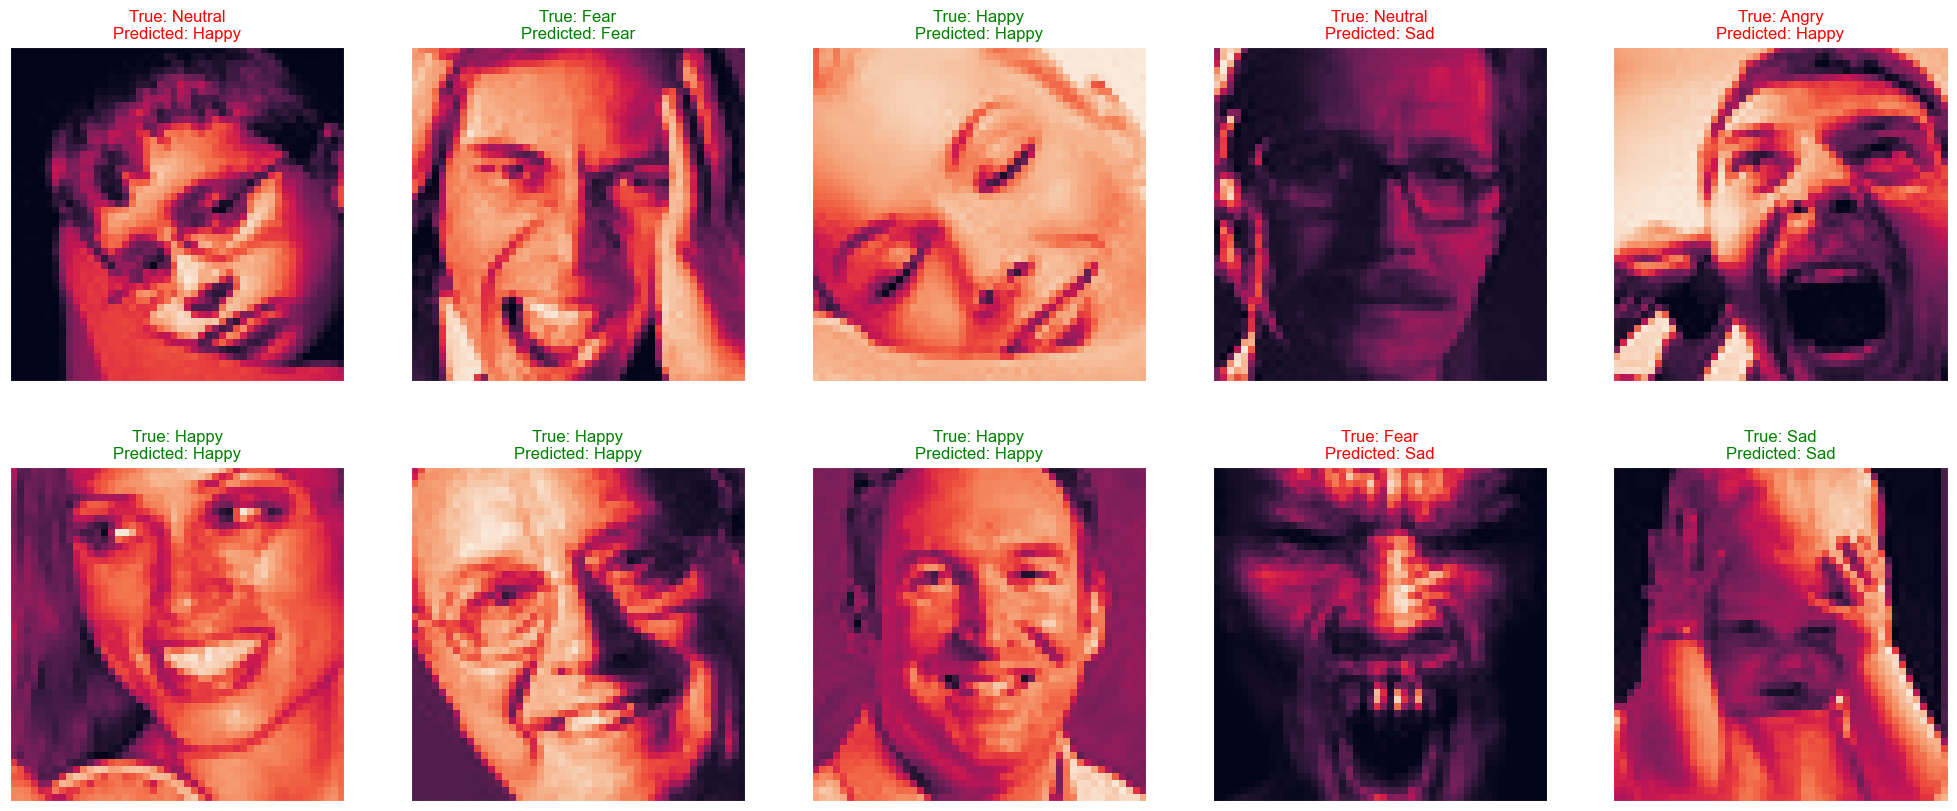

<Figure size 640x480 with 0 Axes>

In [31]:
Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Prediction = np.argmax(model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))
    ax.imshow(Random_Img)
    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()


In [32]:
Predictions =model.predict(test_generator)
#Choosing highest probalbilty class in every prediction 
Model_Predictions = np.argmax(Predictions, axis=1)

449/449 [==============================] - 134s 298ms/step


Text(0.5, 1.0, 'Confusion Matrix')

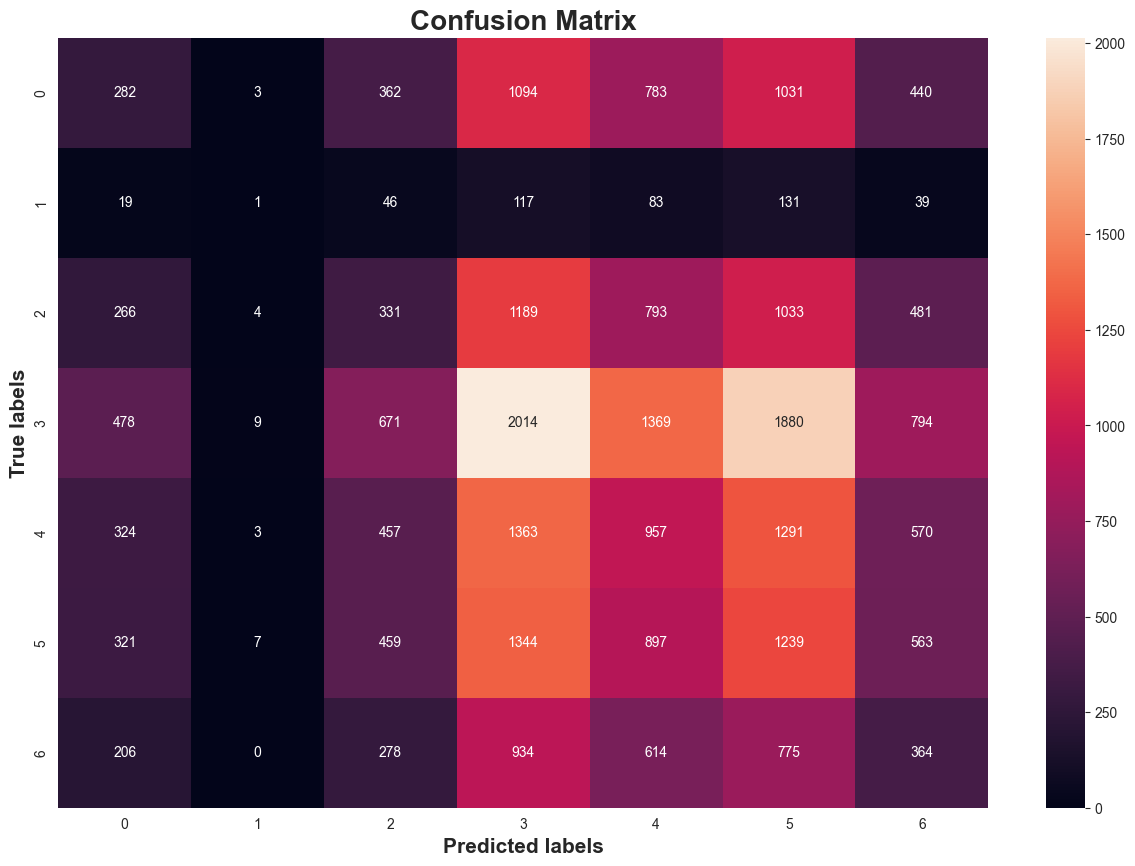

In [33]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax= plt.subplots(figsize=(15,10))
cm=confusion_matrix(test_generator.labels, Model_Predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [34]:
music_df =pd.read_csv("data_moods.csv")

In [42]:
music_df

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60
...,...,...,...,...
681,windcatcher,Leo Nocta,Calm,36
682,yellow is the color of her eyes,Soccer Mommy,Sad,5
683,you broke me first,Tate McRae,Sad,87
684,you were good to me,Jeremy Zucker,Sad,76


In [35]:
music_df = music_df[['name','artist','mood','popularity']]
music_df.head()


,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [36]:
music_df["mood"].value_counts()


Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

In [37]:
music_df["popularity"].value_counts()

0     92
51    23
52    22
50    21
55    21
      ..
80     1
2      1
14     1
15     1
88     1
Name: popularity, Length: 83, dtype: int64

In [38]:
Play = music_df[music_df['mood'] =='Calm' ]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)
display(Play)


,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Curiosity,Beau Projet,Calm,60
2,Escaping Time,Benjamin Martins,Calm,60
3,Just Look at You,369,Calm,59
4,Vague,Amaranth Cove,Calm,59


In [39]:
# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(pred_class):
    
    if( pred_class=='Disgust' ):

        Play = music_df[music_df['mood'] =='Sad' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Happy' or pred_class=='Sad' ):

        Play = music_df[music_df['mood'] =='Happy' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Fear' or pred_class=='Angry' ):

        Play = music_df[music_df['mood'] =='Calm' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)
        
    if( pred_class=='Surprise' or pred_class=='Neutral' ):

        Play = music_df[music_df['mood'] =='Energetic' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

In [40]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
    
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")  


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
def load_and_prep_image(filename, img_shape = 48):
    img = cv2.imread(filename)
    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    for x,y,w,h in faces:
        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
        faces = faceCascade.detectMultiScale(roi_Img, 1.1, 4)
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]
    Img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Img= cv2.resize(Img,(img_shape,img_shape))
    Img = Img/255.
    return Img
